In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/ingr_map.pkl
data/interactions_test.csv
data/interactions_train.csv
data/interactions_validation.csv
data/PP_recipes.csv
data/PP_users.csv
data/RAW_interactions.csv
data/RAW_recipes.csv


In [3]:
df1 = pd.read_csv('data/interactions_test.csv', delimiter=',')
df1.dataframeName = 'interactions_test.csv'

df2 = pd.read_csv('data/interactions_train.csv', delimiter=',')
df2.dataframeName = 'interactions_train.csv'

df3 = pd.read_csv('data/interactions_validation.csv', delimiter=',')
df3.dataframeName = 'interactions_validations.csv'



In [19]:
def plotCorrelationMatrix2(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [36]:
def plotCorrelationMatrix(data,graphWidth):
    width = graphWidth
    height = graphWidth
    title = data.dataframeName
    filename = data.dataframeName
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]]
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    conf_mat = round(data.corr(method ="spearman"), 2)
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    ax.set_xticklabels(labels = conf_mat.index, fontsize = 18,rotation=90)
    ax.set_yticklabels(labels = conf_mat.index, fontsize = 18,rotation = 0)
    plt.show()

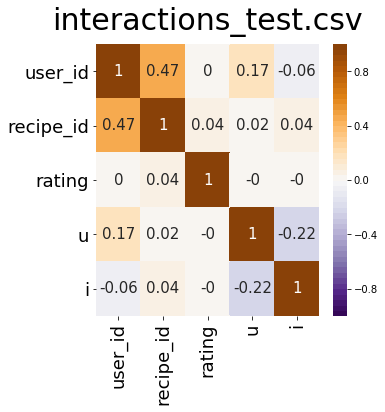

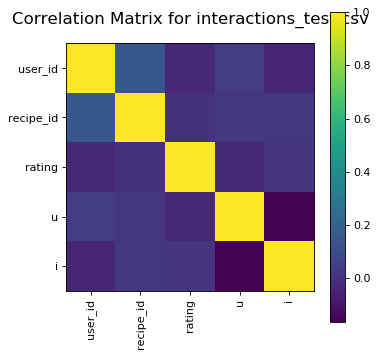

In [37]:
plotCorrelationMatrix(df1, 5)
plotCorrelationMatrix2(df1,5)

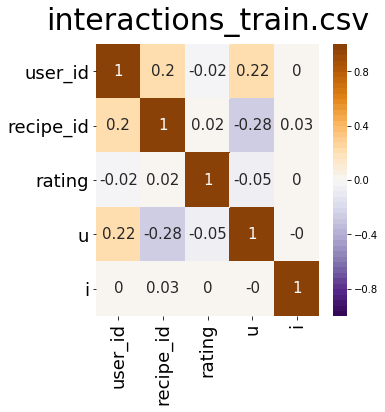

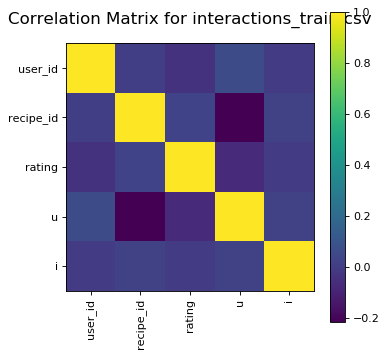

In [38]:
plotCorrelationMatrix(df2, 5)
plotCorrelationMatrix2(df2,5)

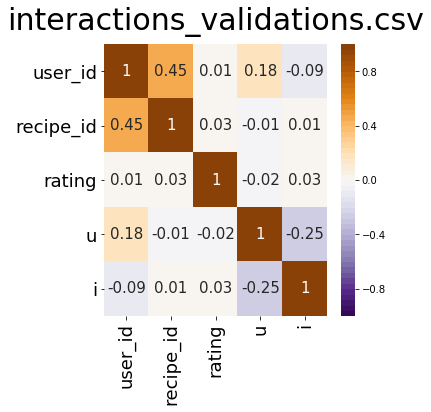

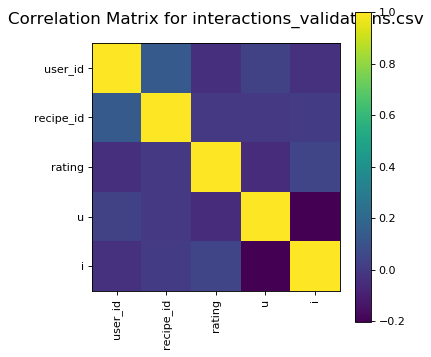

In [39]:
plotCorrelationMatrix(df3, 5)
plotCorrelationMatrix2(df3,5)